# Exploration Data Analysis and Visualization with Duolingo User Datasets¶

* The dataset comes from Duolingo in 2016, which is the world's most popular platform to learn a language.


The columns are as follows:

* p_recall - proportion of exercises from this lesson/practice where the word/lexeme was correctly recalled
* timestamp - UNIX timestamp of the current lesson/practice
* delta - time (in seconds) since the last lesson/practice that included this word/lexeme
* user_id - student user ID who did the lesson/practice (anonymized)
* learning_language - language being learned
* ui_language - user interface language (presumably native to the student)
* lexeme_id - system ID for the lexeme tag (i.e., word)
* lexeme_string - lexeme tag (see below)
* history_seen - total times user has seen the word/lexeme prior to this lesson/practice
* history_correct - total times user has been correct for the word/lexeme prior to this lesson/practice
* session_seen - times the user saw the word/lexeme during this lesson/practice
* session_correct - times the user got the word/lexeme correct during this lesson/practice


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import datetime as dt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
df = pd.read_csv('duolingo.learning_traces.13m.csv', nrows=1000000)
# there are 12854226 rows in this csv file, it's too big, so we only analyze the first 1000000
df.shape

(1000000, 12)

In [3]:
df.head(10)

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.00,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.50,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.00,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.50,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.00,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1
5,1.00,1362076081,27649635,u:FO,de,en,56429751fdaedb6e491f4795c770f5a4,der/der<det><def><m><sg><nom>,4,3,1,1
6,1.00,1362076081,27649635,u:FO,de,en,1bacf218eaaf9f944e525f7be9b31899,kind/kind<n><nt><sg><nom>,4,4,1,1
7,1.00,1362082032,444407,u:dDwF,es,en,73eecb492ca758ddab5371cf7b5cca32,bajo/bajo<pr>,3,3,1,1
8,1.00,1362082044,5963,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,8,6,6,6
9,0.75,1362082044,5963,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,6,5,4,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
p_recall             1000000 non-null float64
timestamp            1000000 non-null int64
delta                1000000 non-null int64
user_id              1000000 non-null object
learning_language    1000000 non-null object
ui_language          1000000 non-null object
lexeme_id            1000000 non-null object
lexeme_string        1000000 non-null object
history_seen         1000000 non-null int64
history_correct      1000000 non-null int64
session_seen         1000000 non-null int64
session_correct      1000000 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 91.6+ MB


In [5]:
df.isnull().sum()
# there is no all_null features

p_recall             0
timestamp            0
delta                0
user_id              0
learning_language    0
ui_language          0
lexeme_id            0
lexeme_string        0
history_seen         0
history_correct      0
session_seen         0
session_correct      0
dtype: int64

In [6]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

## Classify into Numerical and Catigorical Data

In [7]:
df_num = df.select_dtypes(include=['float64', 'int64'])
num_features = df_num.columns.tolist()

df_cat = df.select_dtypes(include=['object'])
cat_features = df_cat.columns.tolist()

print('numerical features:', len(num_features), '\n', num_features, '\n')
print('catigorical features:', len(cat_features), '\n', cat_features)

numerical features: 7 
 ['p_recall', 'timestamp', 'delta', 'history_seen', 'history_correct', 'session_seen', 'session_correct'] 

catigorical features: 5 
 ['user_id', 'learning_language', 'ui_language', 'lexeme_id', 'lexeme_string']


## Analyze Numerical Data

### Histogram graphs

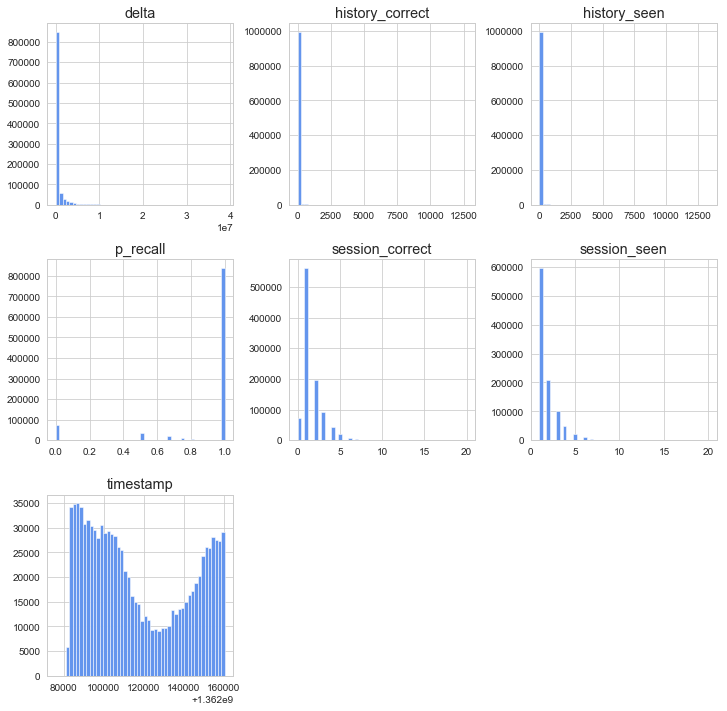

In [8]:
df_num.hist(figsize=(12,12),bins=50, color='cornflowerblue')
plt.show()

### Relationship between features

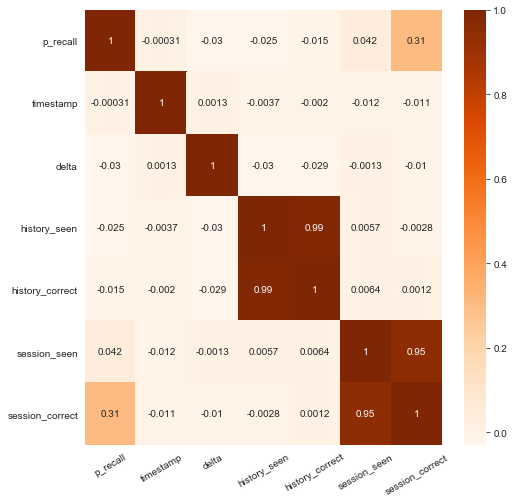

In [9]:
corr = df_num.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cmap='Oranges', annot=True)
plt.xticks(rotation=30)
plt.yticks(rotation=0)
plt.show()

* We can see high correlation between session_seen & session_correct, history_seen & history_correct
* It's super easy to make sense of the correlation, the more you see, the more you get correct.

## Analyze Catigorical Data

In [10]:
df_cat.head()

,user_id,learning_language,ui_language,lexeme_id,lexeme_string
0,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>
1,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>
2,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>
3,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>
4,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>


In [11]:
len(df_cat['user_id'].unique())

20204

In [12]:
# en: english pt: Português es: spanish it: Italian
df_cat['learning_language'].unique()

array(['de', 'es', 'pt', 'en', 'fr', 'it'], dtype=object)

In [13]:
# ui_language: user interface language
df_cat['ui_language'].unique()

array(['en', 'pt', 'es', 'it'], dtype=object)

### Visualize catigorical feature with Pie chat

####  Pie chart on 'learning_language'

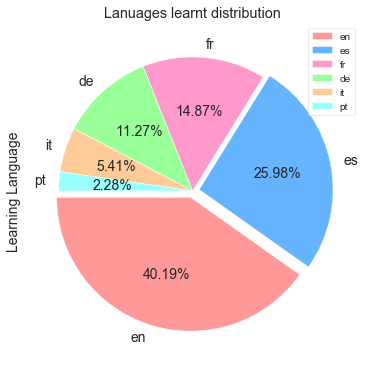

In [14]:
colors = ['#ff9999','#66b3ff','#ff99cc','#99ff99','#ffcc99', '#99ffff']
fig=plt.figure(figsize=(6,12))
df_cat['learning_language'].value_counts().plot.pie(autopct='%.2f%%', startangle=180, colors=colors, 
                                                    explode=[0.05,0.05,0,0,0,0], textprops={'fontsize': 14})
plt.title('Lanuages learnt distribution')
plt.ylabel('Learning Language', fontname='Arial', fontsize=14)
plt.legend()
plt.show()

* From the chart, we can see English is the most popular language, followed by Spanish.

#### Pie chart on interface language distribution

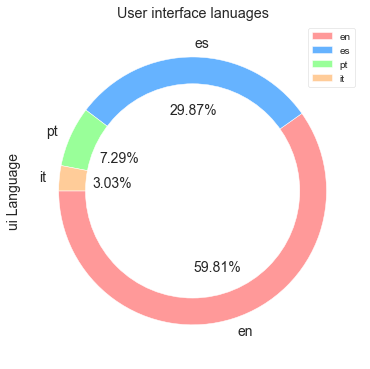

In [15]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig=plt.figure(figsize=(6,12))
df_cat['ui_language'].value_counts().plot.pie(autopct='%.2f%%', startangle=180, colors=colors, 
                                             textprops={'fontsize': 14} )
plt.title('User interface lanuages')
plt.ylabel('ui Language', fontname='Arial', fontsize=14)
plt.legend()
# draw a circle
centre_circle = plt.Circle((0,0), 0.8, fc='white')
# 0.8 means the ratio of radius of small circle to the outer circle
#plt.gcf used to get the current figure
fig=plt.gcf()
#gets the current axes
fig.gca().add_artist(centre_circle)
plt.show()

**Note:**
* Most user are using English interface.
* It is better to do further analysis on english interface.
* But the percentages don't represent the percent of users are learning that language.

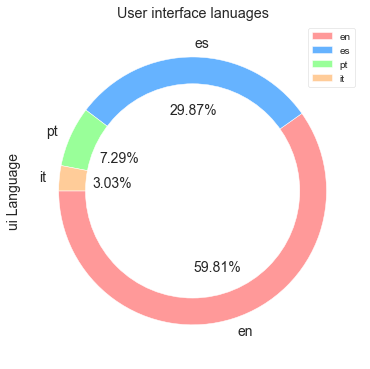

In [16]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig=plt.figure(figsize=(6,12))
df_cat['ui_language'].value_counts().plot.pie(autopct='%.2f%%', startangle=180, colors=colors, 
                                             textprops={'fontsize': 14} )
plt.title('User interface lanuages')
plt.ylabel('ui Language', fontname='Arial', fontsize=14)
plt.legend()
# draw a circle
centre_circle = plt.Circle((0,0), 0.8, fc='white')
# 0.8 means the ratio of radius of small circle to the outer circle
#plt.gcf used to get the current figure
fig=plt.gcf()
#gets the current axes
fig.gca().add_artist(centre_circle)
plt.show()

#### Distribution of language learning for English interface

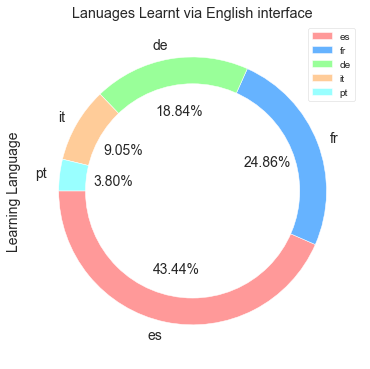

In [17]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#99ffff']
fig=plt.figure(figsize=(6,12))
df_cat[df_cat.ui_language=='en']['learning_language'].value_counts().plot.pie(
                                             autopct='%.2f%%', startangle=180, colors=colors, 
                                             textprops={'fontsize': 14} )
plt.title('Lanuages Learnt via English interface')
plt.ylabel('Learning Language', fontname='Arial', fontsize=14)
plt.legend()
# draw a circle
centre_circle = plt.Circle((0,0), 0.8, fc='white')
# 0.8 means the ratio of radius of small circle to the outer circle
#plt.gcf used to get the current figure
fig=plt.gcf()
#gets the current axes
fig.gca().add_artist(centre_circle)
plt.show()

**Note:** We can guess Spanish, and French are the two most popular in English speakers

#### Distribution of language learning for other interfaces except English

**Note:** The other interface language includes: 'pt', 'es', 'it'

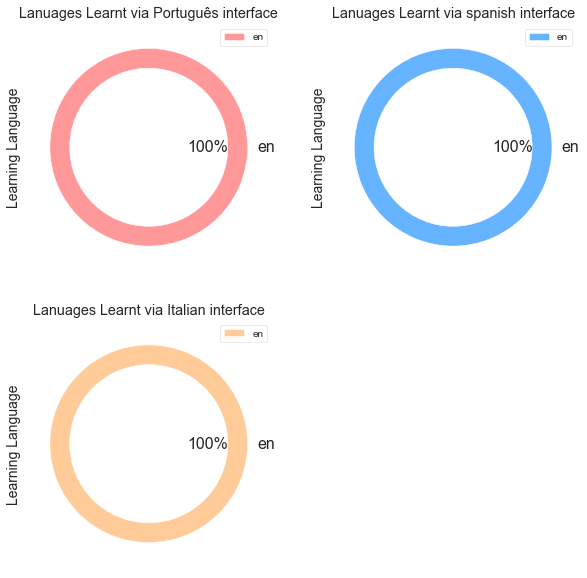

In [18]:
colors = ['#ff9999','#66b3ff','#ffcc99', '#99ffff']
fig=plt.figure(figsize=(10,10))
ui_lan = ['pt', 'es', 'it']
ui_lang = ['Português', 'spanish', 'Italian']
for i in range(len(ui_lan)):
    plt.subplot(2, 2, i+1)
    df_cat[df_cat.ui_language==ui_lan[i]]['learning_language'].value_counts().plot.pie(
                                                                autopct='%.0f%%', startangle=180, colors=colors[i:], 
                                                                textprops={'fontsize': 16} )
    plt.title('Lanuages Learnt via %s interface' %ui_lang[i])
    plt.ylabel('Learning Language', fontname='Arial', fontsize=14)
    plt.legend()
    # draw a circle
    centre_circle = plt.Circle((0,0), 0.8, fc='white')
    # 0.8 means the ratio of radius of small circle to the outer circle
    #plt.gcf used to get the current figure
    fig=plt.gcf()
    #gets the current axes
    fig.gca().add_artist(centre_circle)
plt.show()

**Note:** We can see almost non-English speaker are learning only English.

## Analyze user activity patterns

In [19]:
df.head(2)

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1


In [20]:
# union of duration is hour
df_duration = df.groupby('user_id').apply(lambda x: (x['timestamp'].max()-x['timestamp'].min())/3600)\
                                                                                    .round(2).to_frame()
df_duration.head()
# 'user_id' is the index for user_duration

,0
user_id,
u:-DF,0.50
u:-R6,0.00
u:-Re,0.00
u:-TV,19.51
u:-_-,0.00


In [21]:
# exp_duration: the duration of the whole experiment
exp_duration = (df['timestamp'].max()-df['timestamp'].min())/3600

In [22]:
print('Maximun duration: %.2f hours' %df_duration.max().values)
print('Minimun duration: %.2f hours' %df_duration.min().values)
print('Experiment duration: %.2f hours' %exp_duration)

Maximun duration: 21.62 hours
Minimun duration: 0.00 hours
Experiment duration: 23.50 hours


In [23]:
df_activity = df['user_id'].value_counts().to_frame().merge(df_duration, how='inner', right_index=True,\
                                                             left_index=True)
#'user_id' is the index for user_activity, merge the two on index
df_activity.reset_index(inplace=True)
df_activity.columns = ['user_id', 'entries', 'duration']
df_activity['activity'] = df_activity.apply(lambda x: round(x[1]/x[2],2) if x[2]!=0 else 0 ,axis=1)
df_activity.head()

,user_id,entries,duration,activity
0,u:ia1J,2041,3.07,664.82
1,u:bcH_,1531,7.01,218.40
2,u:eMgB,1233,20.63,59.77
3,u:wpZ,1230,17.88,68.79
4,u:gp3v,1037,19.65,52.77


**Note:  Some users might learn several languages, let's find out how many users were learning multilple languages.**

### Mutiple-language Learners

In [24]:
df.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1


In [25]:
df_lan = df.groupby(['user_id', 'learning_language', 'ui_language']).size().to_frame().reset_index()
df_lan.columns= ['user_id', 'learning_language', 'ui_language','subentries']
df_mut_lan = df_lan['user_id'].value_counts().loc[lambda x : x>1].value_counts().to_frame().reset_index()
df_mut_lan.columns = ['number of languages', 'number of users'] 
df_mut_lan

,number of languages,number of users
0,2,245
1,3,24
2,4,3
3,5,1


In [26]:
# Or
df.groupby(['user_id', 'ui_language'])['learning_language'].agg('nunique').loc[lambda x:x>1].value_counts()

2    234
3     24
4      3
5      1
Name: learning_language, dtype: int64

**Summery:**

**There were 272 uers who were learning more than one languages**

**244 uers were learning 2 kinds of languages.**

**24 uers were learning 3 kinds of languages.**

**3 users were learning 4 kinds of languages.**

**1 users were learning 5 kinds of languages.**


In [27]:
df_new = pd.merge(df_lan, df_activity, how='left', on='user_id', copy=False)
df_new.tail(5)

,user_id,learning_language,ui_language,subentries,entries,duration,activity
20505,u:zh7,en,es,51,51,19.83,2.57
20506,u:zs4,de,en,14,14,0.02,700.00
20507,u:zu0,en,es,50,50,0.18,277.78
20508,u:zxy,fr,en,75,75,0.25,300.00
20509,u:zz3,de,en,25,25,0.00,0.00


In [28]:
len(df_new)

20510

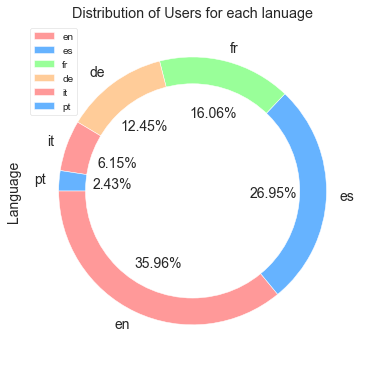

In [29]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig=plt.figure(figsize=(6,12))
df_new['learning_language'].value_counts().plot.pie(autopct='%.2f%%', startangle=180, colors=colors, 
                                             textprops={'fontsize': 14} )
plt.title('Distribution of Users for each lanuage')
plt.ylabel('Language', fontname='Arial', fontsize=14)
plt.legend()
# draw a circle
centre_circle = plt.Circle((0,0), 0.8, fc='white')
# 0.8 means the ratio of radius of small circle to the outer circle
#plt.gcf used to get the current figure
fig=plt.gcf()
#gets the current axes
fig.gca().add_artist(centre_circle)
plt.show()

* There were 35.95% of users learning English.
* There were 26.95% of users learning Spanish.

## Boxplot


**df_new record the activity for each user**

### Compare activity levels for people with different learning languages by drawing boxplots

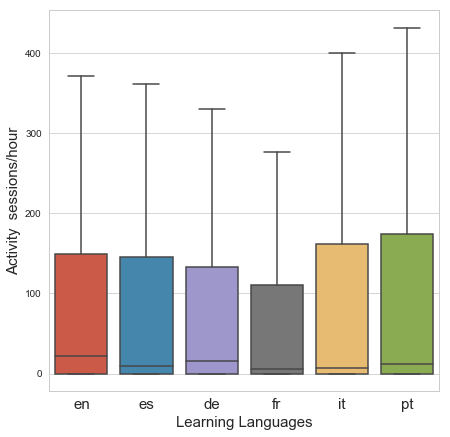

In [30]:
fig = plt.figure(figsize=(7,7))
sns.boxplot(x='learning_language', y='activity', data=df_new, showfliers=False)
plt.xticks(fontsize=15)
plt.ylabel('Activity  sessions/hour',fontsize=15)
plt.xlabel('Learning Languages', fontsize=15)

plt.show()

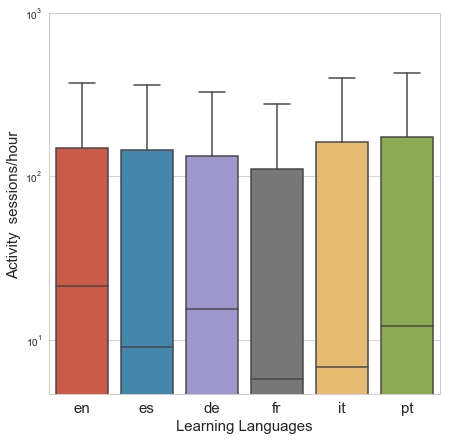

In [31]:
fig = plt.figure(figsize=(7,7))
sns.boxplot(x='learning_language', y='activity', data=df_new, showfliers=False)
plt.xticks(fontsize=15)
plt.ylabel('Activity  sessions/hour',fontsize=15)
plt.xlabel('Learning Languages', fontsize=15)
plt.yscale('log')
plt.ylim(0,1000)
plt.show()

**We can clearly see the difference between midians in the second yscaled boxplot.**<br>
**English learning has the biggest median in activity.**

###  Compare activity levels for people with different user interface languages by drawing boxplots

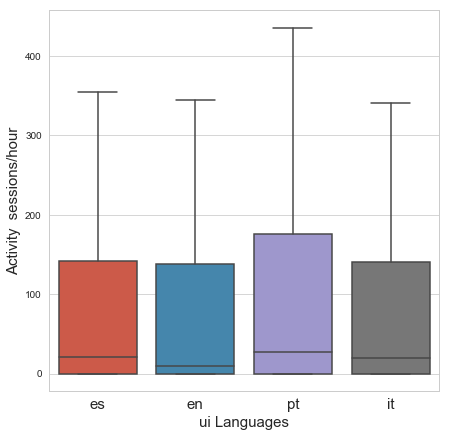

In [32]:
fig = plt.figure(figsize=(7,7))
sns.boxplot(x='ui_language', y='activity', data=df_new, showfliers=False)
plt.xticks(fontsize=15)
plt.ylabel('Activity  sessions/hour',fontsize=15)
plt.xlabel('ui Languages', fontsize=15)

plt.show()

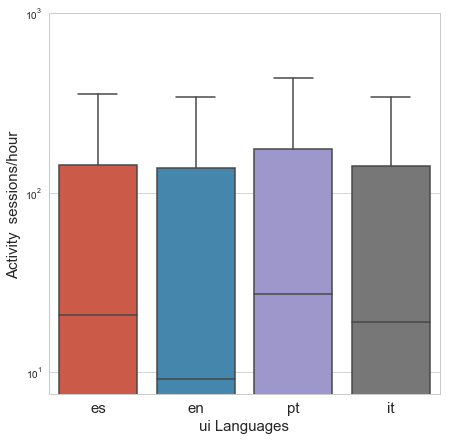

In [33]:
fig = plt.figure(figsize=(7,7))
sns.boxplot(x='ui_language', y='activity', data=df_new, showfliers=False)
plt.xticks(fontsize=15)
plt.ylabel('Activity  sessions/hour',fontsize=15)
plt.xlabel('ui Languages', fontsize=15)
plt.yscale('log')
plt.ylim(0,1000)
plt.show()

### Scatter plot between session_seen & p_recall

In [34]:
df.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1


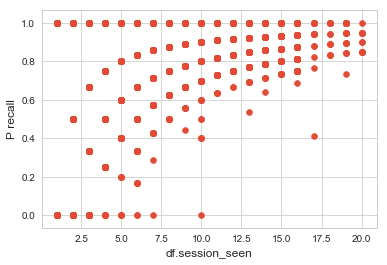

In [35]:
plt.figure()
plt.scatter(df.session_seen, df.p_recall)
plt.xlabel('df.session_seen')
plt.ylabel('P recall')
plt.show()

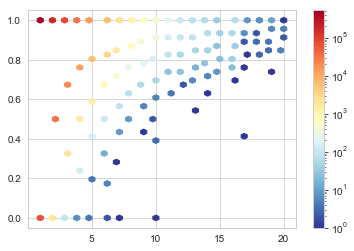

In [36]:
plt.figure()
plt.hexbin(df.session_seen, df.p_recall,gridsize=40,bins='log', mincnt=1, cmap='RdYlBu_r') 
# gridsize: the number of hexagons in the x-direction.
# bins: the color of each hexagon directly corresponds to its count value. 
# If 'log', use a logarithmic scale for the colormap
# mincnt: If not None, only display cells with more than mincnt number of points in the cell.
plt.colorbar()
plt.show()

### Scatter plot betwwen session_seen & average of p_recall

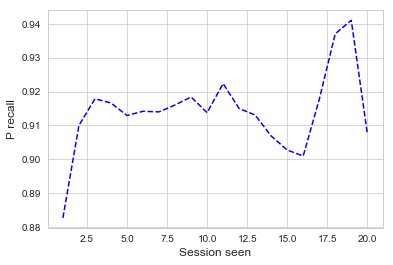

In [37]:
plt.figure()
plt.plot(df.groupby('session_seen')['p_recall'].mean(), 'b--')
plt.xlabel('Session seen')
plt.ylabel('P recall')
plt.show()

### Scatter plot betwwen history_seen & average of p_recall

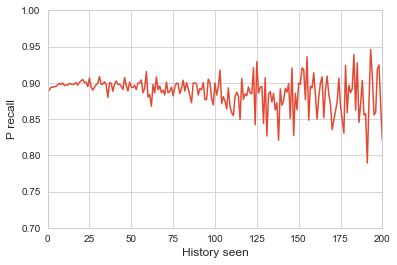

In [38]:
plt.figure()
plt.plot(df.groupby('history_seen')['p_recall'].mean())
plt.xlim(0,200)
plt.ylim(0.7,1)
plt.xlabel('History seen')
plt.ylabel('P recall')
plt.show()

### Scatter plot betwwen history_seen & p_recall when session_seen>5

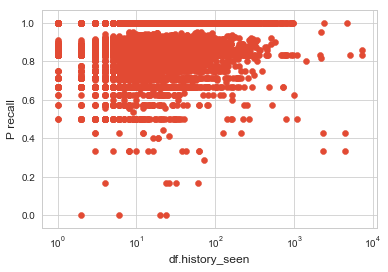

In [39]:
plt.figure()
plt.scatter(df[df.session_seen>5].history_seen, df[df.session_seen>5].p_recall)
plt.xlabel('df.history_seen')
plt.ylabel('P recall')
plt.xscale('log')
plt.show()

### Scatter plot betwwen history_seen & p_recall with log scale

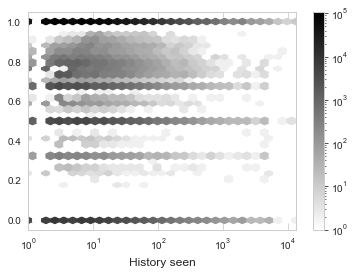

In [40]:

plt.figure()
plt.hexbin(df.history_seen, df.p_recall, xscale='log',gridsize=30,bins='log', cmap='binary')
plt.xlabel('History seen')
plt.xscale('log')
plt.colorbar()
plt.show()

In [41]:
df = pd.merge(df, df_activity[['user_id', 'activity']], on='user_id', how='inner', copy=False)
df.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,activity
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2,17.71
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1,17.71
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1,17.71
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1,17.71
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1,17.71


In [42]:
df.activity.max(), df.activity.min()

(7000.0, 0.0)

In [43]:
df.activity.median()

86.67

### Hexbin plot the relation between delta and p_recall with log scale

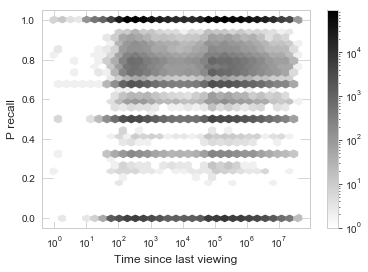

In [44]:
plt.hexbin(df.delta, df.p_recall,gridsize=30,xscale='log', bins='log', cmap='binary')
plt.xlabel('Time since last viewing')
plt.ylabel('P recall')

plt.colorbar()
plt.show()

In [45]:
df.delta.max(), df.delta.min(), df.delta.median()

(38776707, 1, 71576.0)

### Scatter and Hexbin plot relation between user activity and delta

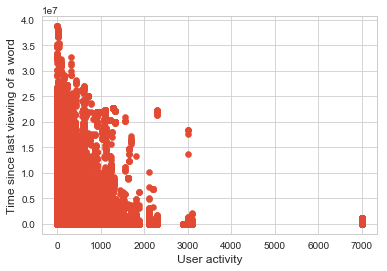

In [46]:
plt.scatter(df.activity, df.delta)
plt.xlabel('User activity')
plt.ylabel('Time since last viewing of a word')
plt.show()

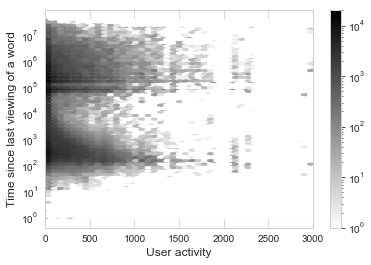

In [47]:
plt.hexbin(df.activity, df.delta, yscale='log',bins='log', cmap='binary')
plt.xlabel('User activity')
plt.ylabel('Time since last viewing of a word')
plt.xlim(0,3000)
plt.colorbar()
plt.show()

## Time Series

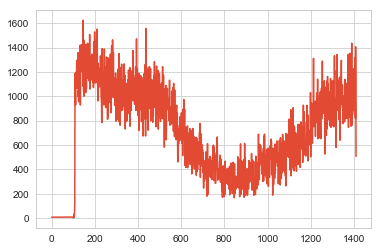

In [52]:
plt.plot(((df.timestamp-df.timestamp.min())/60).round(0).value_counts().sort_index())

In [121]:
import datetime
import pytz
bottom = datetime.datetime.fromtimestamp(df.timestamp.min()+800*60)
bottom

datetime.datetime(2013, 3, 1, 2, 48, 1)

In [105]:
tz = pytz.timezone('US/Pacific')
datetime.datetime.fromtimestamp(df.timestamp.min(), tz=tz).strftime('%Y-%m-%d %H:%M:%S')

'2013-02-28 10:28:01'

In [122]:
str(datetime.datetime.fromtimestamp(df.timestamp.min()+119, tz=tz).strftime('%I:%M %p'))

'10:30 AM'

###  Visualize language users daily activity pattern  for each interface language

In [58]:
df.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,activity
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2,17.71
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1,17.71
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1,17.71
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1,17.71
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1,17.71


In [125]:
df_moving_avg= df.groupby('ui_language').apply(lambda x: ((x['timestamp']- df.timestamp.min())/60).round(0).
                                               value_counts().sort_index().rolling(window=10).mean()
                                              )
df_moving_avg = df_moving_avg.to_frame().reset_index()
df_moving_avg.columns = ['ui_language', 'timestamp', 'rolling_avg_count']
df_moving_avg.head(20)

,ui_language,timestamp,rolling_avg_count
0,en,0.0,NaN
1,en,99.0,NaN
2,en,101.0,NaN
3,en,102.0,NaN
4,en,103.0,NaN
5,en,104.0,NaN
6,en,105.0,NaN
7,en,107.0,NaN
8,en,108.0,NaN
9,en,109.0,138.6


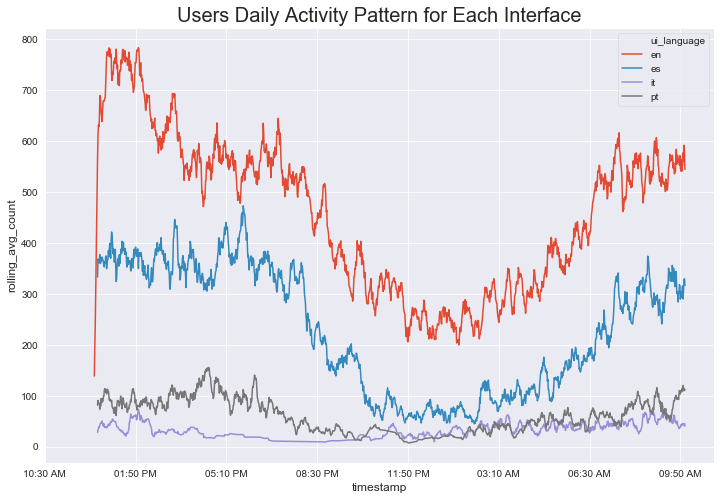

In [126]:
sns.set_style('darkgrid')
from datetime import datetime
plt.figure(figsize=(12,8))
sns.lineplot(y='rolling_avg_count', x='timestamp', data=df_moving_avg, hue='ui_language')
plt.title('Users Daily Activity Pattern for Each Interface', fontsize=20)
# x-axis: 0 represents 10:28:01
x_ticks = [0,200,400,600,800,1000,1200,1400]
tz = pytz.timezone('US/Pacific')
x_new_ticks = [str(datetime.fromtimestamp(df.timestamp.min()+119+i*60, tz=tz).strftime('%I:%M %p')) for i in x_ticks]
plt.xticks(x_ticks, x_new_ticks)
plt.show()